In [3]:
from whma.metrics import mse_K_part
from whma.optim import *
import matplotlib.pyplot as plt
%matplotlib inline

# Gradient of full problem

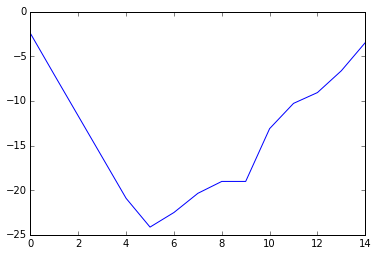

In [5]:
N = []
sizes = np.random.randint(low=15,high=20,size=3)
for n in sizes:
    process = np.sort(np.random.rand(n))
    N.append(process)

cumul = Cumulants(N)
cumul.hMax = .3
cumul.compute_all()

simple_obj = lambda R: mse_K(cumul,R)
simple_grad = lambda R: gradient_f(cumul,R)

d = cumul.dim
R0 = np.random.rand(d**2).reshape(d,d)
rand_mat = np.zeros((d,d))
a,b = np.random.randint(d,size=2)
rand_mat[a,b] += 1.
erreur = []
res1 = np.einsum('ij,ij',simple_grad(R0),rand_mat)
for u in np.arange(0,-15,-1):
    eps = 10**u
    res2 = (simple_obj(R0+eps*rand_mat)-simple_obj(R0-eps*rand_mat))/(2*eps)
    erreur.append(abs(res1-res2)/abs(res1))
import matplotlib.pyplot as plt
plt.plot(np.log(erreur))
plt.show()

# Gradient of approximate problem

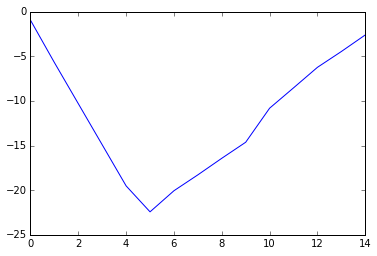

In [6]:
N = []
sizes = np.random.randint(low=15,high=20,size=3)
for n in sizes:
    process = np.sort(np.random.rand(n))
    N.append(process)

cumul = Cumulants(N)
cumul.hMax = .3
cumul.compute_all_part()

simple_obj = lambda R: mse_K_part(cumul,R)
simple_grad = lambda R: gradient_g(cumul,R)

d = cumul.dim
R0 = np.random.rand(d**2).reshape(d,d)
rand_mat = np.zeros((d,d))
a,b = np.random.randint(d,size=2)
rand_mat[a,b] += 1.
erreur = []
res1 = np.einsum('ij,ij',simple_grad(R0),rand_mat)
for u in np.arange(0,-15,-1):
    eps = 10**u
    res2 = (simple_obj(R0+eps*rand_mat)-simple_obj(R0-eps*rand_mat))/(2*eps)
    erreur.append(abs(res1-res2)/abs(res1))
import matplotlib.pyplot as plt
plt.plot(np.log(erreur))
plt.show()